## Why People Quit--An Analysis of Employee Exit Survey Data

Using exit surveys from the [Department of Education, Training and Employment](https://en.wikipedia.org/wiki/Department_of_Education_and_Training_(Queensland) (DETE) and the Technical and Further Education institute(TAFE) in Queensland, Australia, we are looking to answer the following questions:

- Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?

- Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

### Summary 

We found that employees who are over the age of 51 are more likely to resign due to dissatisfactions and employees under the age of 25 are the least likely. Those with more than seven years in the company are more likely to resign out of dissatisfaction and those with under 3 years are the least likely. 


### Reading in Our Data 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dete_survey = pd.read_csv('dete_survey.csv')
tafe_survey = pd.read_csv('tafe_survey.csv')

#### Preliminary Exploration

In [3]:
dete_survey.head(3)

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN


In [4]:
tafe_survey.head(3)

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    float64
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  

In [6]:
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ID                                   822 non-null    int64 
 1   SeparationType                       822 non-null    object
 2   Cease Date                           822 non-null    object
 3   DETE Start Date                      822 non-null    object
 4   Role Start Date                      822 non-null    object
 5   Position                             817 non-null    object
 6   Classification                       455 non-null    object
 7   Region                               822 non-null    object
 8   Business Unit                        126 non-null    object
 9   Employment Status                    817 non-null    object
 10  Career move to public sector         822 non-null    bool  
 11  Career move to private sector        822 non-

In [7]:
tafe_survey['LengthofServiceOverall. Overall Length of Service at Institute (in years)']

0      1-2
1      NaN
2      NaN
3      NaN
4      3-4
      ... 
697    1-2
698    NaN
699    5-6
700    1-2
701    3-4
Name: LengthofServiceOverall. Overall Length of Service at Institute (in years), Length: 702, dtype: object

In [8]:
tafe_survey['LengthofServiceOverall. Overall Length of Service at Institute (in years)'].value_counts()

Less than 1 year      147
1-2                   102
3-4                    96
11-20                  89
More than 20 years     71
5-6                    48
7-10                   43
Name: LengthofServiceOverall. Overall Length of Service at Institute (in years), dtype: int64

In [9]:
tafe_survey['Reason for ceasing employment'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: Reason for ceasing employment, dtype: int64

In [10]:
tafe_survey[['Contributing Factors. Dissatisfaction','Contributing Factors. Job Dissatisfaction']].notnull().sum()

Contributing Factors. Dissatisfaction        437
Contributing Factors. Job Dissatisfaction    437
dtype: int64

### Initial Observations

Each of our datasets have well over 50 columns, the majority of which are not germane to our analysis. Keeping in mind our initial aim, we are mainly interested in: length of employment time, dissatisfaction, and age as it relates to both of these factors. 

#### Three main issues
- The `dete_survey` dataframe contains `Not Stated` values that are not represented as NaN-this needs to be read in as NaN.
- Both contain many columns that are not needed for our analysis--we will eliminate irrelevant columns
- In both surveys there are multiple columns that indicate resignation due to dissatisfaction, this needs to be handled.

Let's start with the first issue: read in our data set once more, this time with `Not Stated` values being read in as `NaN`.

In [11]:
# read in our data once more to change 'Not Stated' to `NaN`
tafe_survey = pd.read_csv('tafe_survey.csv', na_values='Not Stated')
dete_survey = pd.read_csv('dete_survey.csv', na_values='Not Stated')

In [12]:
tafe_survey.head(3)

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
dete_survey.head(3)

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN


We will now drop columns 28-49 in our `dete` survey to make our dataset easier to work with.

In [14]:
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis=1)

We can do the same thing for our `tafe` survey, dropping columns 17-66.

In [15]:
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66],axis=1)

In [16]:
tafe_survey_updated.head(3)

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN


In our tafe survey, columns 17-66 covered details as to *why* the employee left which were simply not necessary to guaging whether there was dissatisfaction (answered in our retained data), which is the purpose of our analysis. Columns 28-49 in our dete survey were dropped for the same reasons. 

### Cleaning Our Columns Names

Each of our two dataframes contain many of the same columns but with different names. We will need to standardize these to make combining datasets later on, easier.

In [17]:
# update our dete survey column names--make all capitalization lowercase, 
# remove trailing whitespace and replace ' ' with '_'
dete_survey_updated.columns = dete_survey_updated.columns.str.strip().str.replace(' ','_').str.lower()

# update column names for tafe survey
tafe_cols = {
    'Record ID': 'id',
    'CESSATION YEAR': 'cease_date',
    'Reason for ceasing employment': 'separationtype',
    'Gender.What is your Gender?':'gender',
    'CurrentAge. Current Age': 'age',
    'Employment Type. Employment Type': 'employment_status',
    'Classification. Classification': 'position',
    'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
    'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service',
}

tafe_survey_updated.rename(columns=tafe_cols, inplace=True)
    

In [18]:
dete_survey_updated.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

In [19]:
tafe_survey_updated.columns

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE',
       'Gender. What is your Gender?', 'age', 'employment_status', 'position',
       'institute_service', 'role_service'],
      dtype='object')

### Removing Unnecessary Data

Keeping in mind that our end goal was to answer the following question: 
- Are employees who have only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been at the job longer?

With that in mind we are only interested in analyzing separation types:`Resignation`. Also, note that our dete dataframe containes *multiple* types of resignations, we will have to account for these separately. 

In [20]:
# display all different resignation types
dete_survey_updated['separationtype'].unique()

array(['Ill Health Retirement', 'Voluntary Early Retirement (VER)',
       'Resignation-Other reasons', 'Age Retirement',
       'Resignation-Other employer',
       'Resignation-Move overseas/interstate', 'Other',
       'Contract Expired', 'Termination'], dtype=object)

In [21]:
tafe_survey_updated['separationtype']

0      Contract Expired
1            Retirement
2            Retirement
3           Resignation
4           Resignation
             ...       
697         Resignation
698         Resignation
699         Resignation
700    Contract Expired
701         Resignation
Name: separationtype, Length: 702, dtype: object

Notice that our tafe survey has only one resignation type and can be left as-is. Now, in our dete dataframe, let's select all rows where `separationtype` is any one of three resignation types. 

In [22]:
# accounting for all 3 types of resignations, ignoring all others
dete_resignations = dete_survey_updated[(dete_survey_updated['separationtype'] == 'Resignation-Other reasons') |
                                        (dete_survey_updated['separationtype'] == 'Resignation-Move overseas/interstate') |
                                        (dete_survey_updated['separationtype'] == 'Resignation-Other employer') ].copy()
# there's only one type of resignation for the tafe survey                                       
tafe_resignations = tafe_survey_updated[tafe_survey_updated['separationtype'] == 'Resignation'].copy()

In [23]:
tafe_resignations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 340 entries, 3 to 701
Data columns (total 23 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   id                                                   340 non-null    float64
 1   Institute                                            340 non-null    object 
 2   WorkArea                                             340 non-null    object 
 3   cease_date                                           335 non-null    float64
 4   separationtype                                       340 non-null    object 
 5   Contributing Factors. Career Move - Public Sector    332 non-null    object 
 6   Contributing Factors. Career Move - Private Sector   332 non-null    object 
 7   Contributing Factors. Career Move - Self-employment  332 non-null    object 
 8   Contributing Factors. Ill Health                     332 non-null    o

#### Checking our Years Columns for Inconsistencies

So far, we have two dataframes: `dete_resignations` and `tafe_resignations` that contain only employees that resigned. Let's check our years column in both dataframes to make sure everything is consistent and logical.

In [24]:
dete_resignations['cease_date'].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
07/2012      1
2010         1
09/2010      1
07/2006      1
Name: cease_date, dtype: int64

We will need to extract the year for this column.

In [25]:
# extract only the four digit year
dete_resignations['cease_date'] = dete_resignations['cease_date'].str[-4:]

In [26]:
# convert our year column to float 
dete_resignations['cease_date'] = dete_resignations['cease_date'].astype(float)

In [27]:
dete_resignations['cease_date'].value_counts()

2013.0    146
2012.0    129
2014.0     22
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

In [28]:
dete_resignations['dete_start_date'].value_counts()

2011.0    24
2008.0    22
2012.0    21
2007.0    21
2010.0    17
2005.0    15
2004.0    14
2006.0    13
2009.0    13
2013.0    10
2000.0     9
1999.0     8
1994.0     6
2003.0     6
1992.0     6
1996.0     6
1998.0     6
2002.0     6
1990.0     5
1997.0     5
1980.0     5
1993.0     5
1989.0     4
1991.0     4
1988.0     4
1995.0     4
1986.0     3
2001.0     3
1985.0     3
1983.0     2
1976.0     2
1974.0     2
1975.0     1
1984.0     1
1971.0     1
1982.0     1
1972.0     1
1963.0     1
1977.0     1
1973.0     1
1987.0     1
Name: dete_start_date, dtype: int64

Next, we'll subtract the year they started from the year they left to ensure there are no negative values which would make no sense.

In [29]:
# double checking for negative values which would indicate erroneous data
negative_date_check = dete_resignations['cease_date'] - dete_resignations['dete_start_date']

In [30]:
negative_date_check.value_counts().sort_index(ascending=False)

49.0     1
42.0     1
41.0     1
39.0     3
38.0     1
36.0     2
35.0     1
34.0     1
33.0     1
32.0     3
31.0     1
30.0     2
29.0     1
28.0     2
27.0     1
26.0     2
25.0     2
24.0     4
23.0     4
22.0     6
21.0     3
20.0     7
19.0     3
18.0     5
17.0     6
16.0     5
15.0     7
14.0     6
13.0     8
12.0     6
11.0     4
10.0     6
9.0     14
8.0      8
7.0     13
6.0     17
5.0     23
4.0     16
3.0     20
2.0     14
1.0     22
0.0     20
dtype: int64

With all of our dates logical and consistent. Let's turn our attention to the `cease_date` column in our tafe survey.

In [31]:
tafe_resignations['cease_date'].value_counts().sort_index()

2009.0      2
2010.0     68
2011.0    116
2012.0     94
2013.0     55
Name: cease_date, dtype: int64

So far, there are no major issues with years.
Since our first goal for the analysis concerns employees who have worked for the instititues a "short period of time", we will compute the employment term for the `dete_resignations` dataframe and assign it to a new column, `institute_service`. In the tafe survey this column already exists as `institute_service`.

In [32]:
tafe_resignations['institute_service'].value_counts()

Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
7-10                  21
More than 20 years    10
Name: institute_service, dtype: int64

In [33]:
# create a new column with length of employment for the dete survey
dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']

In [34]:
dete_resignations['institute_service'].value_counts().sort_index()

0.0     20
1.0     22
2.0     14
3.0     20
4.0     16
5.0     23
6.0     17
7.0     13
8.0      8
9.0     14
10.0     6
11.0     4
12.0     6
13.0     8
14.0     6
15.0     7
16.0     5
17.0     6
18.0     5
19.0     3
20.0     7
21.0     3
22.0     6
23.0     4
24.0     4
25.0     2
26.0     2
27.0     1
28.0     2
29.0     1
30.0     2
31.0     1
32.0     3
33.0     1
34.0     1
35.0     1
36.0     2
38.0     1
39.0     3
41.0     1
42.0     1
49.0     1
Name: institute_service, dtype: int64

### Identifying Dissatisfied Employees for the Tafe Survey (Criteria)

Before we can find the answer to whether employees who resigned early did so out of dissatisfaction, we must identify dissatisfied employees! For the tafe survey, the columns we will use to classify an employee as "dissatisfied" will be:

- `Contributing Factors. Dissatisfaction`
- `Contributing Factors. Job Dissatisfaction`
- `Contributing Factors. Interpersonal Conflict`

Interpersonal conflict is a type of dissatisfaction (a dissatisfaction with people in work environment) so we will use this column. 
Contributing Factors. Dissatisfaction

### Identifying Dissatisfied Employees for the Dete Survey (Criteria)

For the dete survey, we will use the following columns to categorize employees as "dissatisfied":

- `job_dissatisfaction`
- `dissatisfaction_with_the_department`
- `physical_work_environment`
- `lack_of_recognition`
- `lack_of_job_security`
- `work_location`
- `employment_conditions`
- `work_life_balance`
- `workload`


In both datasets, if employees indicated any of the factors above caused them to resign, we will mark them as `dissatisfied` in a new column. 


First, will convert all dissatisfaction indicator columns to bool or NaN values.If there is a single `True` value in any of those columns, we will add a `True` value to our new `dissatisfied` column.

In [35]:
tafe_resignations[tafe_resignations['Contributing Factors. Dissatisfaction'] == 'Contributing Factors. Dissatisfaction']

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Gender. What is your Gender?,age,employment_status,position,institute_service,role_service


We can see above that there are some trailing whitespace characters in our column names! Lbet's take care of that. 

In [36]:
# remove leading or trailing whitespace characters
tafe_resignations.columns = tafe_resignations.columns.str.strip()

Let's take a look at `value_counts` to see how many affirmative answers we have for our indicative columns

In [37]:
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts()

-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [38]:
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts()

-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [39]:
tafe_resignations['Contributing Factors. Interpersonal Conflict'].value_counts()

-                         308
Interpersonal Conflict     24
Name: Contributing Factors. Interpersonal Conflict, dtype: int64

Next we will create a function`update_vals` that will update our columns to `True`, `False` or `NaN`.

In [40]:
# updates our indicative columns to True, False, or NaN
def update_vals(value):
    if pd.isnull(value):
        return np.nan
    elif value == '-':
        return False
    else:
        return True


In [41]:
# all our dissatisfaction indicator columns
tafe_factors = ['Contributing Factors. Dissatisfaction',
                'Contributing Factors. Job Dissatisfaction',
                'Contributing Factors. Interpersonal Conflict'
               ]

In [42]:
# apply updated values to all columns
tafe_resignations[tafe_factors] = tafe_resignations[tafe_factors].applymap(update_vals)

Next we will add a `True` value to our dissatisfaction column if any of the `tafe_factor` columns have a `True` value.

In [43]:
tafe_resignations['dissatisfied'] = tafe_resignations[tafe_factors].any(axis=1,skipna=False)

In [44]:
tafe_resignations_up = tafe_resignations.copy()

We will now follow the same process for our `dete_resignations` dataframe, converting all column values to `True` `False` or `Nan`, and creating a new column, `dissatisfaction`

In [45]:
# all our dissatisfaction indicator columns
dete_factors = ['job_dissatisfaction',
                'dissatisfaction_with_the_department',
                'physical_work_environment',
                'lack_of_recognition',
                'lack_of_job_security',
                'work_location',
                'employment_conditions',
                'work_life_balance',
                'workload'
               ]




In [46]:
# assign True value if any of the factor columns are True
dete_resignations['dissatisfied'] = dete_resignations[dete_factors].any(axis=1,skipna=False)

In [47]:
dete_resignations_up = dete_resignations.copy()

In [48]:
dete_resignations['dissatisfied']

3      False
5       True
8      False
9       True
11     False
       ...  
808    False
815    False
816    False
819     True
821    False
Name: dissatisfied, Length: 311, dtype: bool

So far we've:

- Cleaned our columns names
- Dropped any data not needed for our analysis 
- Verified the quality of our data
- Created new columns for time employed (`institute_service`)
- Cleaned the `Contributing Factors` column
- Created the `dissatisfaction` column to indicate if an employee resigned due to dissatisfaction

### Combining our Datasets

Before combining let's add a column,`institute` to our dataset that will allow us to easily distinguish the difference. 

In [49]:
dete_resignations_up['institute'] = 'DETE'

In [50]:
tafe_resignations_up['institute'] = 'TAFE'

In [51]:
combined = pd.concat([dete_resignations_up, tafe_resignations_up], axis=0)


In [52]:
combined['dissatisfied'].notnull().sum()

651

In [53]:
# drop any columns with less than 500 non-null values
combined_updated = combined.dropna(axis=1,thresh=340).copy()

In [54]:
combined_updated.columns

Index(['id', 'separationtype', 'cease_date', 'position', 'employment_status',
       'age', 'institute_service', 'dissatisfied', 'institute', 'Institute',
       'WorkArea'],
      dtype='object')

As we said in the beginning, most of the columns are not germane to our primary aim of analyzing employee dissatisfaction in regards to length of employment. We can drop any columns with less than 500 non-null values without impacting our analysis goals. 

### Analyzing Our Data

As we see here, our data is now in many different forms. In order to analyze our data, we will convert these numbers to *categories*. Our logic, in part, is based on [this article](https://www.businesswire.com/news/home/20171108006002/en/Age-Number-Engage-Employees-Career-Stage) which makes the argument that understanding employee's needs according to career stage is more effective than according to age. 

We will use the following definitions to categorize our `institute_service` column:
- `New`: Less than 3 years at a company 
- `Experienced`: 3-6 years at a company
- `Established`: 7-10 years at a company
- `Veteran`: 11 or more years at a company
   

In [55]:
combined_updated['institute_service'].value_counts()

Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
3.0                   20
0.0                   20
6.0                   17
4.0                   16
9.0                   14
2.0                   14
7.0                   13
More than 20 years    10
13.0                   8
8.0                    8
15.0                   7
20.0                   7
10.0                   6
14.0                   6
12.0                   6
17.0                   6
22.0                   6
18.0                   5
16.0                   5
11.0                   4
23.0                   4
24.0                   4
32.0                   3
39.0                   3
19.0                   3
21.0                   3
36.0                   2
25.0                   2
30.0                   2
26.0                   2
28.0                   2
49.0                   1


In [56]:
def transform_service(value):
    
    # if null, return NaN
    if pd.isnull(value):
        return np.nan
    # convert to string value, just in case
    string_value = str(value)
    if string_value == 'Less than 1 year':
        return 'New'
    elif string_value == 'More than 20 years':
        return 'Veteran'
    
    # if there's a range, take the lower number 
    if '-' in string_value:
        string_value = string_value.split('-')                             
        string_value = float(string_value[0])

    string_value = float(string_value)
   
    if string_value < 3:
        return 'New'
    elif 3 <= string_value <= 6:
        return 'Experienced'
    elif 7 <= string_value <= 10:
        return 'Established'
    elif string_value >= 11:
        return 'Veteran'

    

Let's now apply our `transform_service` function across our `institute_service` column and assign to a new column, `service_cat`.

In [57]:
combined_updated['service_cat'] = combined_updated['institute_service'].apply(transform_service)

We now have our categorical data ready for analysis!

In [58]:
combined_updated['service_cat']

3      Established
5          Veteran
8      Experienced
9          Veteran
11     Experienced
          ...     
696    Experienced
697            New
698            NaN
699    Experienced
701    Experienced
Name: service_cat, Length: 651, dtype: object

In [59]:
combined_updated.head()

,id,separationtype,cease_date,position,employment_status,age,institute_service,dissatisfied,institute,Institute,WorkArea,service_cat
3,4.0,Resignation-Other reasons,2012.0,Teacher,Permanent Full-time,36-40,7.0,False,DETE,NaN,NaN,Established
5,6.0,Resignation-Other reasons,2012.0,Guidance Officer,Permanent Full-time,41-45,18.0,True,DETE,NaN,NaN,Veteran
8,9.0,Resignation-Other reasons,2012.0,Teacher,Permanent Full-time,31-35,3.0,False,DETE,NaN,NaN,Experienced
9,10.0,Resignation-Other employer,2012.0,Teacher Aide,Permanent Part-time,46-50,15.0,True,DETE,NaN,NaN,Veteran
11,12.0,Resignation-Move overseas/interstate,2012.0,Teacher,Permanent Full-time,31-35,3.0,False,DETE,NaN,NaN,Experienced


Let's now finally drop the `Institute`, `institute_service` and `WorkArea` columns as they are not needed for this analysis. 

In [60]:
combined_updated.drop(columns=['Institute','WorkArea'],inplace=True)

Let's also drop the `institute service` column since we've already created the `service_cat` column for our categorical data.

In [61]:
combined_updated.drop('institute_service',axis=1, inplace=True)

In [62]:
combined_updated

,id,separationtype,cease_date,position,employment_status,age,dissatisfied,institute,service_cat
3,4.000000e+00,Resignation-Other reasons,2012.0,Teacher,Permanent Full-time,36-40,False,DETE,Established
5,6.000000e+00,Resignation-Other reasons,2012.0,Guidance Officer,Permanent Full-time,41-45,True,DETE,Veteran
8,9.000000e+00,Resignation-Other reasons,2012.0,Teacher,Permanent Full-time,31-35,False,DETE,Experienced
9,1.000000e+01,Resignation-Other employer,2012.0,Teacher Aide,Permanent Part-time,46-50,True,DETE,Veteran
11,1.200000e+01,Resignation-Move overseas/interstate,2012.0,Teacher,Permanent Full-time,31-35,False,DETE,Experienced
...,...,...,...,...,...,...,...,...,...
696,6.350660e+17,Resignation,2013.0,Operational (OO),Temporary Full-time,21 25,False,TAFE,Experienced
697,6.350668e+17,Resignation,2013.0,Teacher (including LVT),Temporary Full-time,51-55,False,TAFE,New
698,6.350677e+17,Resignation,2013.0,NaN,NaN,NaN,False,TAFE,NaN
699,6.350704e+17,Resignation,2013.0,Teacher (including LVT),Permanent Full-time,51-55,False,TAFE,Experienced


In [63]:
combined_updated['dissatisfied'].value_counts(dropna=False)

False    397
True     254
Name: dissatisfied, dtype: int64

In [64]:
# create pivot table for dissatisfaction percentages
combined_pv = combined_updated.pivot_table(index='service_cat',values='dissatisfied')

In [65]:
combined_pv

,dissatisfied
service_cat,
Established,0.516129
Experienced,0.354651
New,0.316062
Veteran,0.485294


We can already see from our pivot table that employees in the`Established` and `Veteran` stages of their career are more likely to leave due to dissatisfaction. Let's create a visual to display the differences. 

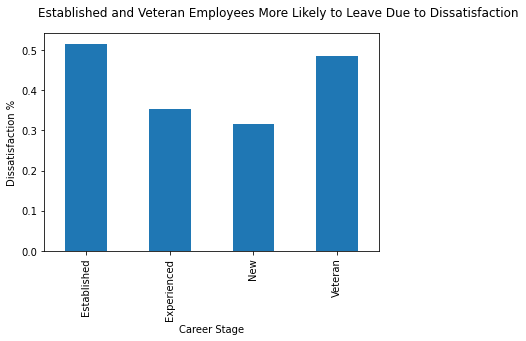

In [126]:
combined_pv.plot(kind='bar', legend=False)
plt.title('Established and Veteran Employees More Likely to Leave Due to Dissatisfaction',x=.7,y=1.05)
plt.ylabel('Dissatisfaction %')
plt.xlabel('Career Stage')
plt.show()

From then graph above it appears that **new (less than 3 years) employees are the least likely to resign due to a dissatisfaction.**

### Dealing with Missing Values

In our `service_cat` column we still have missing values. Let's first find out how many of our rows with missing values contain `True` in the dissatisfaction column.

In [67]:
combined_updated[(combined_updated['service_cat'].isnull()) & combined_updated['dissatisfied'] == True].shape

(34, 9)

There are only 34 of 651 employees who resigned due to a dissatifaction, but have missing values for the `service_cat` column. We must figure out how we should deal with those missing values. We can either ignore them and drop the null rows, or fill them. Let's look at the distribution of values in our `service_cat` column.

In [68]:
combined_updated['service_cat'].value_counts(normalize=True)

New            0.342806
Experienced    0.305506
Veteran        0.241563
Established    0.110124
Name: service_cat, dtype: float64

Since 34 employees will not fundamentally change the results of our analysis, we will  make the decision to drop these columns. 

In [69]:
combined_updated.dropna(subset=['service_cat'],inplace=True)

In [70]:
combined_updated['service_cat'].value_counts(dropna=False)

New            193
Experienced    172
Veteran        136
Established     62
Name: service_cat, dtype: int64

### Analysis Based on Age

We now need to find out if younger employees are resigning due to some kind of dissatisfaction. We also need to do the same for older employees. We will start with cleaning our age column, dealing with our missing values and find out how many resigned in each age group. 

In [71]:
combined_updated.head(3)

,id,separationtype,cease_date,position,employment_status,age,dissatisfied,institute,service_cat
3,4.0,Resignation-Other reasons,2012.0,Teacher,Permanent Full-time,36-40,False,DETE,Established
5,6.0,Resignation-Other reasons,2012.0,Guidance Officer,Permanent Full-time,41-45,True,DETE,Veteran
8,9.0,Resignation-Other reasons,2012.0,Teacher,Permanent Full-time,31-35,False,DETE,Experienced


In [72]:
combined_updated['age'].value_counts()

51-55            69
41  45           45
41-45            44
46  50           39
36-40            36
46-50            34
21  25           33
31  35           32
36  40           32
26  30           32
26-30            31
56 or older      29
31-35            29
21-25            26
56-60            22
61 or older      18
20 or younger    10
Name: age, dtype: int64

We can create a function to quickly standardize our `age`column. 

In [73]:
import re
def clean_age(age):
    if pd.isnull(age):
        return np.nan
    age = str(age)
    # remove trailing/leading whitespace
    age = age.strip()
    # replace multiple whitespace with single
    age = re.sub(r"\s+", ' ',age)
    # insert '-'
    age = re.sub(r"\s",'-',age)
    return age
    

In [74]:
combined_updated['age'] = combined_updated['age'].apply(clean_age)

In [75]:
combined_updated['age'].value_counts()

41-45            89
46-50            73
51-55            69
36-40            68
26-30            63
31-35            61
21-25            59
56-or-older      29
56-60            22
61-or-older      18
20-or-younger    10
Name: age, dtype: int64

Our formatting is now clean. The `56-or-older`, `56-60` and `61-or-older` columns can be consolidated into one value: `56 or older`. We will replace these values, below. 

In [90]:
# consolidate age categories 
age_categories = {
    '56-or-older' : '51-or-older',
    '56-60': '51-or-older',
    '61-or-older': '51-or-older',
    '51-55': '51-or-older',
}

    

In [91]:
combined_updated['age'] = combined_updated['age'].replace(age_categories)

In [92]:
combined_updated['age'].isnull().sum()

0

There are also two `NaN` values to handle. Dropping these rows won't impact our analysis in any significant manner. 

In [93]:
combined_updated.dropna(subset=['age'], inplace=True)

In [94]:
combined_updated['age'].value_counts(dropna=False)

51-or-older      138
41-45             89
46-50             73
36-40             68
26-30             63
31-35             61
21-25             59
20-or-younger     10
Name: age, dtype: int64

Let's now look create a pivot table for our age column and look at the `dissatisfaction` column for each category.

In [101]:
age_dissatisfied_pv = combined_updated.pivot_table(index='age',values='dissatisfied')

In [102]:
age_dissatisfied_pv

,dissatisfied
age,
20-or-younger,0.300000
21-25,0.288136
26-30,0.412698
31-35,0.393443
36-40,0.382353
41-45,0.393258
46-50,0.397260
51-or-older,0.434783


In [96]:
age_dissatisfied_pv = age_dissatisfied_pv['dissatisfied'].sort_values(ascending=False)

Let's plot our values.

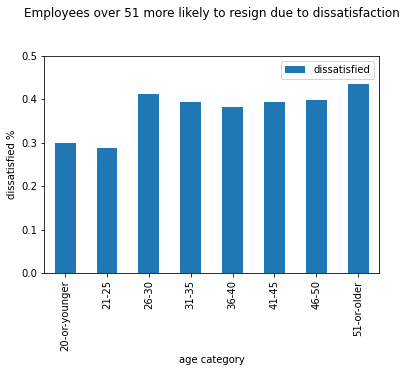

In [119]:
age_dissatisfied_pv.plot(kind='bar',ylim=(0,.5))
plt.ylabel('dissatisfied %')
plt.xlabel('age category')
plt.title('Employees over 51 more likely to resign due to dissatisfaction',x=.5,y=1.15)
plt.show()

We can see that employees over 51 are more likely to resign due to a dissatisfaction over any other age group. We can also come to the conclusion that **employees under 25 years of age are less likely to resign due to dissatifaction than any other group.**

### Conclusion

Our initial questions were--

- Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? 
- What about employees who have been there longer?

- Are younger employees resigning due to some kind of dissatisfaction? 
- What about older employees?

From our analysis we can reach the following conclusions regarding employment length and resignation due to dissatisfaction:
- 33% of employees with 3 or less years who resign, do so due to a 'dissatisfaction'.
- 51% and 48% of established and veteran employees, respectively, resign due to a dissatifcation. 

Roughly half of employees with over 7 years of experience leave the company due to some kind of dissatisfaction. This is significant. 

In regards to age: 
- roughly 1/3 of employees under 25 resign due to a dissatisfaction vs 43% of employees over the age of 51.
- employees under the age of 25 are the *least* likely to leave due to dissatisfaction.


It appears that with time and age employees are more likely to leave the company due to a dissastifaction. 